# Credit risk evaluation model with textual features from loan descriptions for P2P lending


## Data loading

In [24]:
import pandas as pd

raw_data = pd.read_csv('data/accepted_2007_to_2018q4.csv')
raw_data.describe()

C:\Users\Jonah\AppData\Local\Temp\ipykernel_21360\1357717839.py:3: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('data/accepted_2007_to_2018q4.csv')


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [31]:
raw_data.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

## Data preprocessing


In [32]:
preprocessed_data = raw_data.copy()
preprocessed_data['issue_d'] = pd.to_datetime(preprocessed_data['issue_d'], format='%b-%Y')
preprocessed_data = preprocessed_data[preprocessed_data['issue_d'] <= '2014-12-31']

preprocessed_data['earliest_cr_line'] = pd.to_datetime(preprocessed_data['earliest_cr_line'], format='%b-%Y')
preprocessed_data["credit_age"] = (preprocessed_data["issue_d"] - preprocessed_data["earliest_cr_line"]).dt.days / 30
preprocessed_data[['issue_d', 'credit_age']].head()

preprocessed_data.dropna(subset=['desc'], inplace=True)
preprocessed_data['total_rev_hi_lim_per_monthly_income'] = preprocessed_data['total_rev_hi_lim'] / (preprocessed_data['annual_inc'] / 12)
preprocessed_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,credit_age,total_rev_hi_lim_per_monthly_income
1121827,377140,NaN,27675.0,27675.0,27675.0,36 months,6.49,848.09,A,A2,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,178.566667,8.988235
1122318,378843,NaN,16000.0,16000.0,16000.0,60 months,14.99,380.56,C,C5,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,183.633333,2.592000
1125232,361542,NaN,28000.0,28000.0,28000.0,36 months,6.99,864.44,A,A3,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,153.233333,6.024000
1139772,404548,NaN,28000.0,28000.0,28000.0,36 months,8.19,879.88,A,A5,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,243.500000,7.776311
1146602,384151,NaN,3200.0,3200.0,3200.0,36 months,15.59,111.86,D,D1,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,116.700000,4.716279


In [35]:
selected_columns = [
    'issue_d',
    # target variable
    'loan_status',
    # loan characteristics
    'loan_amnt',
    'term',
    'int_rate',
    'purpose',
    # creditworthiness features
    'fico_range_low',
    'grade',
    'inq_last_6mths',
    'revol_util',
    'delinq_2yrs',
    'pub_rec',
    'open_acc',
    'total_rev_hi_lim',  # this needs to be checked. This is just a balance and not "The ratio of revolving line to monthly income" - Paper
    'total_acc',
    'avg_cur_bal',
    'earliest_cr_line',  # this is a date. "The number of months from the time at which the borrower opened his or her first credit card to the loan requests" - Paper
    # Solvency features
    'annual_inc',
    'emp_length',
    'home_ownership',
    'verification_status',
    'dti',
    # Description
    'desc',
]
filtered_data = preprocessed_data[selected_columns]
filtered_data.to_parquet('data/filtered_data.parquet')
filtered_data.describe()
filtered_data.head()


,issue_d,loan_status,loan_amnt,term,int_rate,purpose,fico_range_low,grade,inq_last_6mths,revol_util,...,total_rev_hi_lim,total_acc,avg_cur_bal,earliest_cr_line,annual_inc,emp_length,home_ownership,verification_status,dti,desc
1121827,2014-12-01,Fully Paid,27675.0,36 months,6.49,debt_consolidation,765.0,A,0.0,34.5,...,76400.0,19.0,46368.0,2000-04-01,102000.0,3 years,MORTGAGE,Source Verified,12.40,
1122318,2014-12-01,Current,16000.0,60 months,14.99,debt_consolidation,665.0,C,3.0,61.7,...,21600.0,26.0,15648.0,1999-11-01,100000.0,10+ years,MORTGAGE,Verified,9.89,
1125232,2014-12-01,Fully Paid,28000.0,36 months,6.99,small_business,820.0,A,3.0,8.6,...,125500.0,25.0,71697.0,2002-05-01,250000.0,4 years,MORTGAGE,Not Verified,3.25,
1139772,2014-11-01,Charged Off,28000.0,36 months,8.19,credit_card,675.0,A,0.0,58.8,...,64800.0,46.0,15416.0,1994-11-01,99996.0,1 year,MORTGAGE,Source Verified,22.07,
1146602,2014-11-01,Fully Paid,3200.0,36 months,15.59,major_purchase,720.0,D,2.0,16.3,...,16900.0,12.0,5066.0,2005-04-01,43000.0,10+ years,MORTGAGE,Not Verified,27.07,Looking to borrow to purchase a used boat we a...


## Data exploration

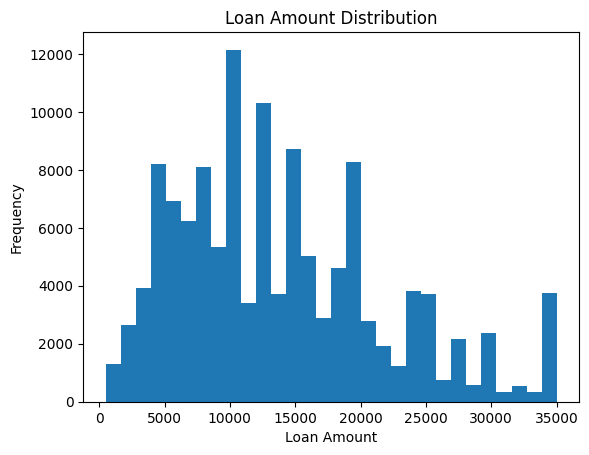

In [42]:
import matplotlib.pyplot as plt

plt.hist(filtered_data['loan_amnt'], bins=30)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

(array([ 3677.,  3031.,  1277.,  9631.,   753.,  6155.,  6938.,  3588.,
         8935.,  9569.,  4424., 11170., 10271.,  3840.,  7159.,  7608.,
         2826.,  5973.,  3235.,  3495.,  2632.,  2142.,  1395.,  1121.,
         1583.,  1146.,  1064.,   515.,   493.,   353.]),
 array([ 5.42 ,  6.108,  6.796,  7.484,  8.172,  8.86 ,  9.548, 10.236,
        10.924, 11.612, 12.3  , 12.988, 13.676, 14.364, 15.052, 15.74 ,
        16.428, 17.116, 17.804, 18.492, 19.18 , 19.868, 20.556, 21.244,
        21.932, 22.62 , 23.308, 23.996, 24.684, 25.372, 26.06 ]),
 <BarContainer object of 30 artists>)

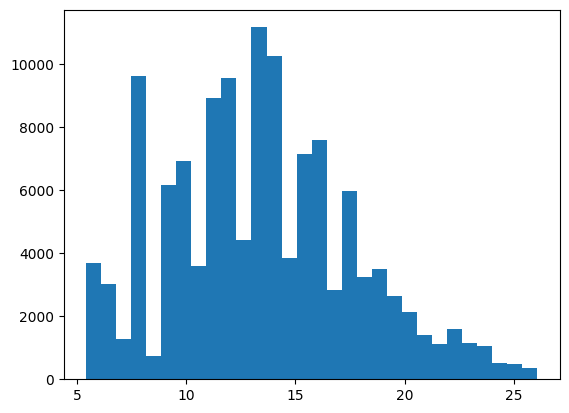

In [43]:
plt.hist(filtered_data['int_rate'], bins=30)